<a href="https://colab.research.google.com/github/abdullahamruf/Fish-Diseses/blob/main/fish_inceptionl(ndam).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:

import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tensorflow import keras
import glob as gb
import pandas as pd
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D ,LeakyReLU
from keras.preprocessing.image import ImageDataGenerator

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
IMG_SIZE = (299, 299) # resolution
directory = "/content/drive/MyDrive/dataset/Fresh Water Fish Dataset - Copy"
BATCH_SIZE = 128
# train_dataset = image_dataset_from_directory(directory,
#                                              shuffle=True,
#                                              labels='inferred',
#                                              batch_size=BATCH_SIZE,
#                                              image_size=IMG_SIZE,
#                                              validation_split=0.2,
#                                              subset='training',
#                                              color_mode='rgb',
#                                              seed=42)
# validation_dataset = image_dataset_from_directory(directory,
#                                              shuffle=True,
#                                              labels='inferred',
#                                              batch_size=BATCH_SIZE,
#                                              image_size=IMG_SIZE,
#                                              validation_split=0.1,
#                                              subset='validation',
#                                              color_mode='rgb',
#                                              seed=42)
# validation_dataset1 = image_dataset_from_directory(directory,
#                                              shuffle=True,
#                                              labels='inferred',
#                                              batch_size=BATCH_SIZE,
#                                              image_size=IMG_SIZE,
#                                              validation_split=0.1,
#                                              subset='validation',
#                                              color_mode='rgb',
#                                              seed=42)





In [80]:
import os
import shutil

# Set the path to your source and destination folders
source_folder = '/content/drive/MyDrive/dataset/Fresh Water Fish Dataset - Copy'
destination_folder = '/content/drive/MyDrive/dataset/fishtest'

# Set the desired percentage of images to move (e.g., 10%)
move_percentage = 0.1

# Function to move the first specified percentage of files from source to destination folder
def move_files(source_folder, destination_folder, move_percentage):
    # Iterate through each subfolder in the source directory
    for subfolder in os.listdir(source_folder):
        subfolder_path = os.path.join(source_folder, subfolder)

        # Check if it's a directory
        if os.path.isdir(subfolder_path):
            # Get the list of files in the subfolder
            files_in_subfolder = [f for f in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, f))]

            # Calculate the number of files to move based on the percentage
            num_files_to_move = max(1, int(move_percentage * len(files_in_subfolder)))

            # Get the first specified percentage of files
            files_to_move = files_in_subfolder[:num_files_to_move]

            # Create subdirectories in the destination folder
            destination_subfolder = os.path.join(destination_folder, subfolder)
            os.makedirs(destination_subfolder, exist_ok=True)

            # Move selected files to the destination subfolder
            for file in files_to_move:
                source_path = os.path.join(subfolder_path, file)
                destination_path = os.path.join(destination_subfolder, file)

                try:
                    shutil.move(source_path, destination_path)
                    print(f"Successfully moved {file} from {subfolder_path} to {destination_subfolder}")
                except Exception as e:
                    print(f"Error moving {file} from {subfolder_path} to {destination_subfolder}: {e}")

# Move files to the destination folder
move_files(source_folder, destination_folder, move_percentage)


Successfully moved gill rot_0_3012.jpeg from /content/drive/MyDrive/dataset/Fresh Water Fish Dataset - Copy/THE BACTERIAL GILL ROT to /content/drive/MyDrive/dataset/fishtest/THE BACTERIAL GILL ROT
Successfully moved gill rot_0_2848.jpeg from /content/drive/MyDrive/dataset/Fresh Water Fish Dataset - Copy/THE BACTERIAL GILL ROT to /content/drive/MyDrive/dataset/fishtest/THE BACTERIAL GILL ROT
Successfully moved gill rot_0_2872.jpeg from /content/drive/MyDrive/dataset/Fresh Water Fish Dataset - Copy/THE BACTERIAL GILL ROT to /content/drive/MyDrive/dataset/fishtest/THE BACTERIAL GILL ROT
Successfully moved gill rot_0_3093.jpeg from /content/drive/MyDrive/dataset/Fresh Water Fish Dataset - Copy/THE BACTERIAL GILL ROT to /content/drive/MyDrive/dataset/fishtest/THE BACTERIAL GILL ROT
Successfully moved gill rot_0_3074.jpeg from /content/drive/MyDrive/dataset/Fresh Water Fish Dataset - Copy/THE BACTERIAL GILL ROT to /content/drive/MyDrive/dataset/fishtest/THE BACTERIAL GILL ROT
Successfully mo

In [81]:
import os
import shutil
import random

# Set the path to your source and destination folders
source_folder = '/content/drive/MyDrive/dataset/Fresh Water Fish Dataset - Copy'
destination_folder = '/content/drive/MyDrive/dataset/Fishvalid'

# Set the desired percentage of images to move (e.g., 10%)
move_percentage = 0.1

# Function to move the specified percentage of files from source to destination folder
def move_files(source_folder, destination_folder, move_percentage):
    # Iterate through each subfolder in the source directory
    for subfolder in os.listdir(source_folder):
        subfolder_path = os.path.join(source_folder, subfolder)

        # Check if it's a directory
        if os.path.isdir(subfolder_path):
            # Get the list of files in the subfolder
            files_in_subfolder = [f for f in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, f))]

            # Calculate the number of files to move based on the percentage
            num_files_to_move = max(1, int(move_percentage * len(files_in_subfolder)))

            # Ensure the number of files to move is not greater than the available files
            num_files_to_move = min(num_files_to_move, len(files_in_subfolder))

            # Get the specified percentage of files randomly
            files_to_move = random.sample(files_in_subfolder, num_files_to_move)

            # Create subdirectories in the destination folder
            destination_subfolder = os.path.join(destination_folder, subfolder)
            os.makedirs(destination_subfolder, exist_ok=True)

            # Move selected files to the destination subfolder
            for file in files_to_move:
                source_path = os.path.join(subfolder_path, file)
                destination_path = os.path.join(destination_subfolder, file)

                try:
                    shutil.move(source_path, destination_path)
                    print(f"Successfully moved {file} from {subfolder_path} to {destination_subfolder}")
                except Exception as e:
                    print(f"Error moving {file} from {subfolder_path} to {destination_subfolder}: {e}")

# Move files to the destination folder
move_files(source_folder, destination_folder, move_percentage)


Successfully moved gill rot_0_1158.jpeg from /content/drive/MyDrive/dataset/Fresh Water Fish Dataset - Copy/THE BACTERIAL GILL ROT to /content/drive/MyDrive/dataset/Fishvalid/THE BACTERIAL GILL ROT
Successfully moved gill rot_0_6490.jpeg from /content/drive/MyDrive/dataset/Fresh Water Fish Dataset - Copy/THE BACTERIAL GILL ROT to /content/drive/MyDrive/dataset/Fishvalid/THE BACTERIAL GILL ROT
Successfully moved THE BACTERIAL GILL ROT_0_4465.jpeg from /content/drive/MyDrive/dataset/Fresh Water Fish Dataset - Copy/THE BACTERIAL GILL ROT to /content/drive/MyDrive/dataset/Fishvalid/THE BACTERIAL GILL ROT
Successfully moved gill rot_0_5254.jpeg from /content/drive/MyDrive/dataset/Fresh Water Fish Dataset - Copy/THE BACTERIAL GILL ROT to /content/drive/MyDrive/dataset/Fishvalid/THE BACTERIAL GILL ROT
Successfully moved gill rot_0_4162.jpeg from /content/drive/MyDrive/dataset/Fresh Water Fish Dataset - Copy/THE BACTERIAL GILL ROT to /content/drive/MyDrive/dataset/Fishvalid/THE BACTERIAL GILL 

In [116]:
import os
import shutil
import random

# Set the path to your source and destination folders
source_folder = '/content/drive/MyDrive/dataset/Fresh Water Fish Dataset - Copy'
destination_folder = '/content/drive/MyDrive/dataset/Fishtrain'

# Set the desired percentage of images to move (e.g., 10%)
move_percentage = 1

# Function to move the specified percentage of files from source to destination folder
def move_files(source_folder, destination_folder, move_percentage):
    # Iterate through each subfolder in the source directory
    for subfolder in os.listdir(source_folder):
        subfolder_path = os.path.join(source_folder, subfolder)

        # Check if it's a directory
        if os.path.isdir(subfolder_path):
            # Get the list of files in the subfolder
            files_in_subfolder = [f for f in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, f))]

            # Calculate the number of files to move based on the percentage
            num_files_to_move = max(1, int(move_percentage * len(files_in_subfolder)))

            # Ensure the number of files to move is not greater than the available files
            num_files_to_move = min(num_files_to_move, len(files_in_subfolder))

            # Get the specified percentage of files randomly
            files_to_move = random.sample(files_in_subfolder, num_files_to_move)

            # Create subdirectories in the destination folder
            destination_subfolder = os.path.join(destination_folder, subfolder)
            os.makedirs(destination_subfolder, exist_ok=True)

            # Move selected files to the destination subfolder
            for file in files_to_move:
                source_path = os.path.join(subfolder_path, file)
                destination_path = os.path.join(destination_subfolder, file)

                try:
                    shutil.move(source_path, destination_path)
                    print(f"Successfully moved {file} from {subfolder_path} to {destination_subfolder}")
                except Exception as e:
                    print(f"Error moving {file} from {subfolder_path} to {destination_subfolder}: {e}")

# Move files to the destination folder
move_files(source_folder, destination_folder, move_percentage)


Successfully moved gill rot_0_8907.jpeg from /content/drive/MyDrive/dataset/Fresh Water Fish Dataset - Copy/THE BACTERIAL GILL ROT to /content/drive/MyDrive/dataset/Fishtrain/THE BACTERIAL GILL ROT
Successfully moved gill rot_0_3840.jpeg from /content/drive/MyDrive/dataset/Fresh Water Fish Dataset - Copy/THE BACTERIAL GILL ROT to /content/drive/MyDrive/dataset/Fishtrain/THE BACTERIAL GILL ROT
Successfully moved gill rot_0_7718.jpeg from /content/drive/MyDrive/dataset/Fresh Water Fish Dataset - Copy/THE BACTERIAL GILL ROT to /content/drive/MyDrive/dataset/Fishtrain/THE BACTERIAL GILL ROT
Successfully moved gill rot_0_3896.jpeg from /content/drive/MyDrive/dataset/Fresh Water Fish Dataset - Copy/THE BACTERIAL GILL ROT to /content/drive/MyDrive/dataset/Fishtrain/THE BACTERIAL GILL ROT
Successfully moved gill rot_0_6132.jpeg from /content/drive/MyDrive/dataset/Fresh Water Fish Dataset - Copy/THE BACTERIAL GILL ROT to /content/drive/MyDrive/dataset/Fishtrain/THE BACTERIAL GILL ROT
Successful

In [117]:
import os

# Set the path to the source folder
source_folder = '/content/drive/MyDrive/dataset/Fresh Water Fish Dataset - Copy'

# Function to count classes and total images
def count_classes_and_images(folder_path):
    classes = os.listdir(folder_path)
    total_classes = len(classes)
    total_images = 0

    for class_name in classes:
        class_path = os.path.join(folder_path, class_name)
        if os.path.isdir(class_path):
            images_in_class = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
            total_images += images_in_class
            print(f"Class: {class_name}, Images: {images_in_class}")

    print(f"Total Classes: {total_classes}, Total Images: {total_images}")

# Count classes and total images in the source folder
count_classes_and_images(source_folder)


Class: THE BACTERIAL GILL ROT, Images: 0
Class: Tail And Fin Rot, Images: 0
Class: Broken antennae and rostrum, Images: 0
Class: Redspot, Images: 0
Class: Argulus, Images: 0
Class: EUS, Images: 0
Class: Healthy Fish, Images: 0
Total Classes: 7, Total Images: 0


In [118]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

IMG_SIZE = (299, 299)  # resolution
BATCH_SIZE = 128

# Define the directories for training, testing, and validation
train_directory = '/content/drive/MyDrive/dataset/Fishtrain'
test_directory = '/content/drive/MyDrive/dataset/fishtest'
valid_directory = '/content/drive/MyDrive/dataset/Fishvalid'

# Create TensorFlow datasets
train_dataset = image_dataset_from_directory(
    train_directory,
    shuffle=True,
    labels='inferred',
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    color_mode='rgb',
    seed=42
)

test_dataset = image_dataset_from_directory(
    test_directory,
    shuffle=True,
    labels='inferred',
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    color_mode='rgb',
    seed=42
)

valid_dataset = image_dataset_from_directory(
    valid_directory,
    shuffle=True,
    labels='inferred',
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    color_mode='rgb',
    seed=42
)

# Optional: You can also specify the class names if you have a specific order for your classes
class_names = train_dataset.class_names

# Print class names
print("Class Names:", class_names)

Found 1616 files belonging to 7 classes.
Found 199 files belonging to 7 classes.
Found 178 files belonging to 7 classes.
Class Names: ['Argulus', 'Broken antennae and rostrum', 'EUS', 'Healthy Fish', 'Redspot', 'THE BACTERIAL GILL ROT', 'Tail And Fin Rot']


In [119]:
class_names = train_dataset.class_names
class_names

['Argulus',
 'Broken antennae and rostrum',
 'EUS',
 'Healthy Fish',
 'Redspot',
 'THE BACTERIAL GILL ROT',
 'Tail And Fin Rot']

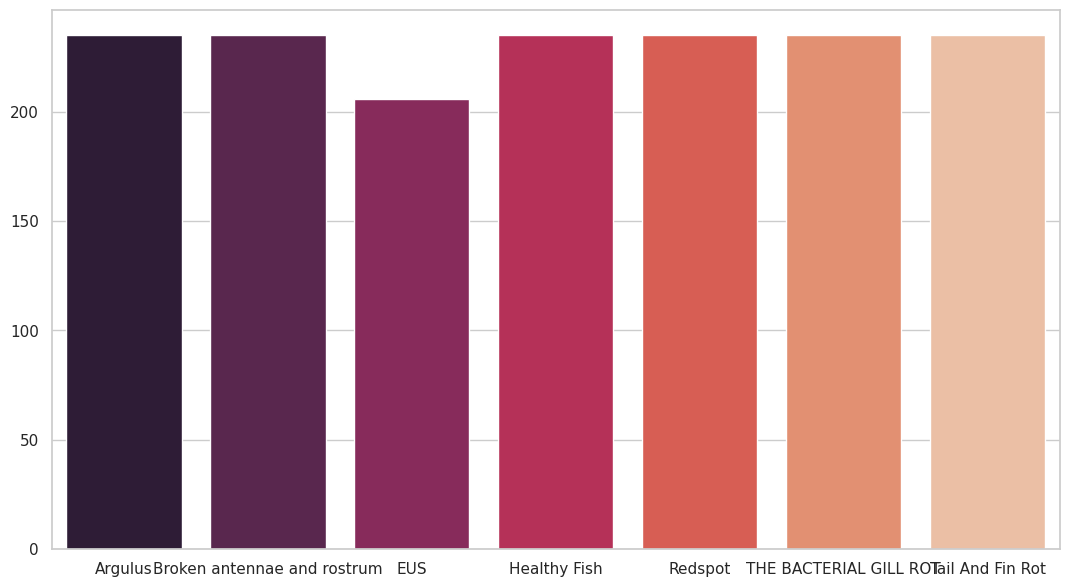

In [122]:
sns.set_theme(style="whitegrid")
Data_imbalance = []
for folder in os.listdir(train_directory):
    files = gb.glob(pathname=str(train_directory + "/" + folder +"/*.*"))
    Data_imbalance.append(len(files))
plt.figure(figsize=(13,7))
sns.barplot(x=["Argulus", "Broken antennae and rostrum", "EUS", "Healthy Fish","Redspot","THE BACTERIAL GILL ROT","Tail And Fin Rot"], y=Data_imbalance, palette="rocket")
plt.show()

Class 'Argulus': 235 samples
Class 'Broken antennae and rostrum': 235 samples
Class 'EUS': 206 samples
Class 'Healthy Fish': 235 samples
Class 'Redspot': 235 samples
Class 'THE BACTERIAL GILL ROT': 235 samples
Class 'Tail And Fin Rot': 235 samples


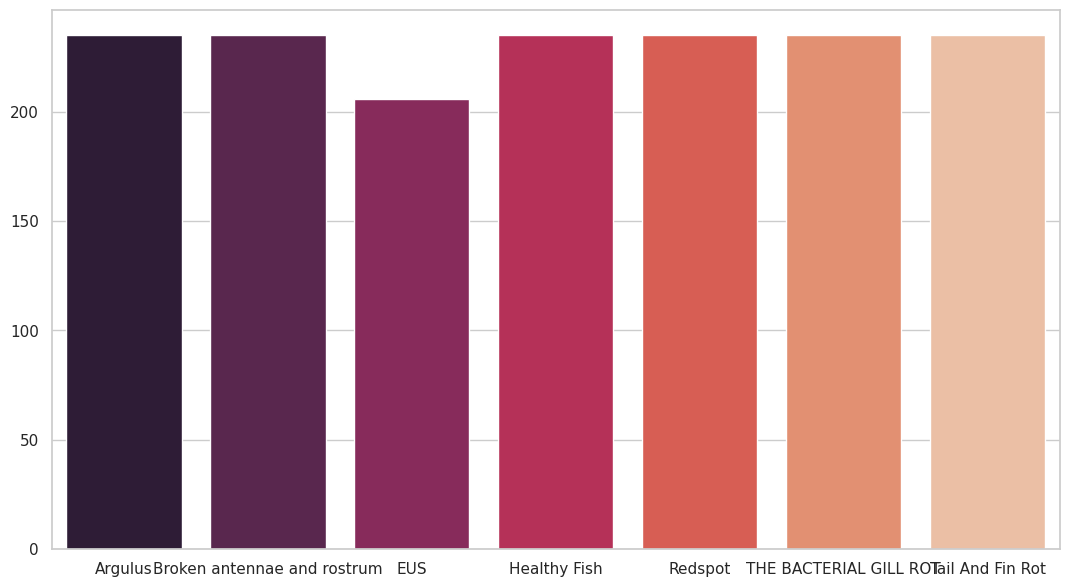

In [123]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import glob as gb

sns.set_theme(style="whitegrid")

# Assuming you already have Data_imbalance calculated
# If not, you should calculate it before using it in this code

# Print the dataset class-wise count
for folder, count in zip(["Argulus", "Broken antennae and rostrum", "EUS", "Healthy Fish","Redspot","THE BACTERIAL GILL ROT","Tail And Fin Rot"], Data_imbalance):
    print(f"Class '{folder}': {count} samples")

# Create the bar plot
plt.figure(figsize=(13,7))
sns.barplot(x=["Argulus", "Broken antennae and rostrum", "EUS", "Healthy Fish","Redspot","THE BACTERIAL GILL ROT","Tail And Fin Rot"], y=Data_imbalance, palette="rocket")
plt.show()


In [124]:
total = 0
for i in range(0,len(Data_imbalance)) :
    total +=Data_imbalance[i]

weight_for_0 = (1 / Data_imbalance[0]) * (total / 7.0)
weight_for_1 = (1 / Data_imbalance[1]) * (total / 7.0)
weight_for_2 = (1 / Data_imbalance[2]) * (total / 7.0)
weight_for_3 = (1 / Data_imbalance[3]) * (total / 7.0)
weight_for_4 = (1 / Data_imbalance[3]) * (total / 7.0)
weight_for_5 = (1 / Data_imbalance[3]) * (total / 7.0)
weight_for_6 = (1 / Data_imbalance[3]) * (total / 7.0)
class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2, 3: weight_for_3,4: weight_for_4,5: weight_for_5,6: weight_for_6}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))
print('Weight for class 2: {:.2f}'.format(weight_for_2))
print('Weight for class 3: {:.2f}'.format(weight_for_3))
print('Weight for class 4: {:.2f}'.format(weight_for_4))
print('Weight for class 5: {:.2f}'.format(weight_for_5))
print('Weight for class 6: {:.2f}'.format(weight_for_6))

Weight for class 0: 0.98
Weight for class 1: 0.98
Weight for class 2: 1.12
Weight for class 3: 0.98
Weight for class 4: 0.98
Weight for class 5: 0.98
Weight for class 6: 0.98


In [125]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.RandomHeight(0.2),
  tf.keras.layers.RandomWidth(0.2),
])

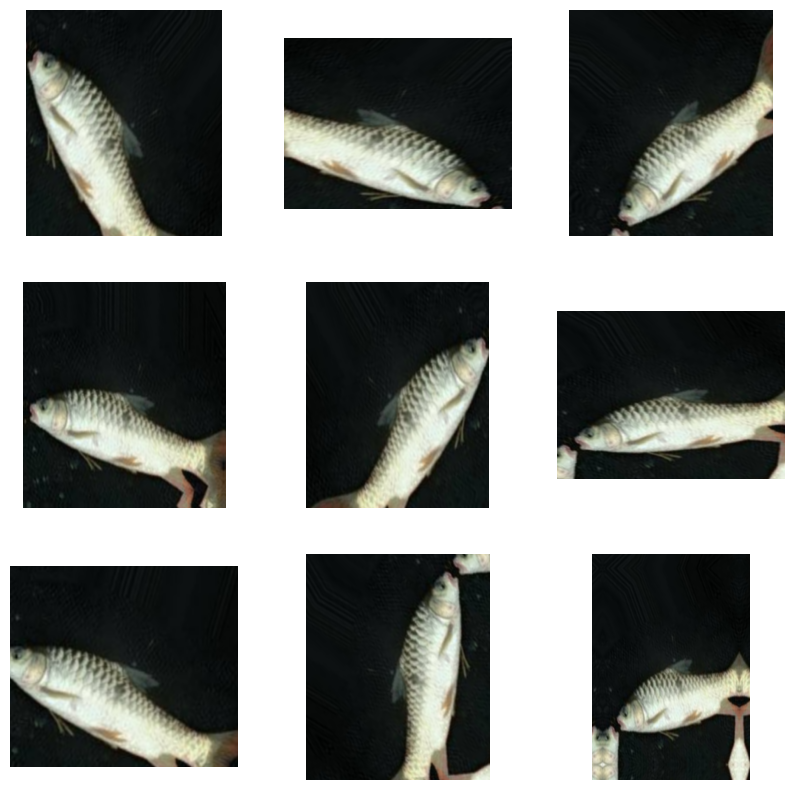

In [126]:
for image, _ in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    first_image = image[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

In [127]:
augmented_count = 0

for image, _ in train_dataset:
    augmented_images = data_augmentation(image)
    augmented_count += augmented_images.shape[0]  # Count the number of augmented images

original_count = len(train_dataset) * BATCH_SIZE  # Total number of original images
total_count = original_count + augmented_count    # Total number of images after augmentation

increase_percentage = ((total_count - original_count) / original_count) * 100

print(f"Original image count: {original_count}")
print(f"Augmented image count: {augmented_count}")
print(f"Total image count after augmentation: {total_count}")
print(f"Increase in image count: {increase_percentage:.2f}%")


Original image count: 1664
Augmented image count: 1616
Total image count after augmentation: 3280
Increase in image count: 97.12%


In [128]:
IMG_SHAPE = IMG_SIZE +(3,)
base_model = tf.keras.applications.InceptionV3(input_shape=IMG_SHAPE, include_top= True, weights='imagenet')

In [129]:
type(base_model)
preprocess_input = tf.keras.applications.inception_v3.preprocess_input

In [130]:
nb_layers = len(base_model.layers)
print("Numbers of Layers =" , nb_layers)
print(base_model.layers[nb_layers - 2].name)  # pre- Last name
print(base_model.layers[nb_layers - 1].name)

Numbers of Layers = 313
avg_pool
predictions


In [131]:
# iterate over first batch (32 image) in trainset
image_batch, label_batch = next(iter(train_dataset))  # 32 image arrays
feature_batch = base_model(image_batch)  # run the model on those 32 image (base model with its 1000 causes classification)
print(feature_batch.shape)  # 32 for number of images in this batch and 1000 for classes

(128, 1000)


In [132]:
def fish( image_shape=IMG_SIZE):
    ''' Define a tf.keras model for multi-class classification out of the InceptionV3 model '''
    image_shape = image_shape + (3,)

    resnet_model = tf.keras.applications.InceptionV3(input_shape=IMG_SHAPE, include_top= False,weights='imagenet')
    resnet_model.trainable = True
    for layer in resnet_model.layers[0 : 291]:
        layer.trainable = False

    inputs = tf.keras.Input(image_shape)
    x = data_augmentation(inputs)
    x = preprocess_input(inputs)
    x = resnet_model(x , training=False)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    prediction_layer = tf.keras.layers.Dense(7 ,activation = "softmax")
    outputs = prediction_layer(x)
    model = tf.keras.Model(inputs, outputs)
    model.summary()
    return model

In [133]:
fish = fish(IMG_SIZE)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 tf.math.truediv_2 (TFOpLam  (None, 299, 299, 3)       0         
 bda)                                                            
                                                                 
 tf.math.subtract_2 (TFOpLa  (None, 299, 299, 3)       0         
 mbda)                                                           
                                                                 
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d_2  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                           

In [134]:
base_learning_rate = 0.001
fish.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=base_learning_rate),
                           loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                           metrics=['accuracy'])

In [135]:
from tensorflow.keras.callbacks import ModelCheckpoint
model_filepath="/content/drive/MyDrive/fishinception-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(
    filepath = model_filepath ,
    monitor ='val_accuracy',
    mode = 'max' ,
    save_best_only =True ,
     verbose = 1

)

In [136]:
history = fish.fit(train_dataset , verbose=2 , epochs=50 ,class_weight=class_weight,
                               validation_data=valid_dataset , use_multiprocessing= True,callbacks =[checkpoint])

Epoch 1/50

Epoch 1: val_accuracy improved from -inf to 0.80899, saving model to /content/drive/MyDrive/fishinception-01-0.8090.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


13/13 - 48s - loss: 1.9271 - accuracy: 0.5167 - val_loss: 0.6419 - val_accuracy: 0.8090 - 48s/epoch - 4s/step
Epoch 2/50

Epoch 2: val_accuracy improved from 0.80899 to 0.92697, saving model to /content/drive/MyDrive/fishinception-02-0.9270.hdf5
13/13 - 13s - loss: 0.3306 - accuracy: 0.9208 - val_loss: 0.2457 - val_accuracy: 0.9270 - 13s/epoch - 965ms/step
Epoch 3/50

Epoch 3: val_accuracy improved from 0.92697 to 0.96629, saving model to /content/drive/MyDrive/fishinception-03-0.9663.hdf5
13/13 - 12s - loss: 0.1386 - accuracy: 0.9598 - val_loss: 0.1495 - val_accuracy: 0.9663 - 12s/epoch - 907ms/step
Epoch 4/50

Epoch 4: val_accuracy did not improve from 0.96629
13/13 - 11s - loss: 0.0778 - accuracy: 0.9765 - val_loss: 0.1635 - val_accuracy: 0.9494 - 11s/epoch - 811ms/step
Epoch 5/50

Epoch 5: val_accuracy did not improve from 0.96629
13/13 - 10s - loss: 0.0522 - accuracy: 0.9845 - val_loss: 0.1416 - val_accuracy: 0.9494 - 10s/epoch - 800ms/step
Epoch 6/50

Epoch 6: val_accuracy did no

In [137]:
fish.evaluate(test_dataset , verbose = 1)

2/2 [==============================] - 26s 281ms/step - loss: 1.0802 - accuracy: 0.8291


[1.0802465677261353, 0.8291457295417786]

1/1 [==============================] - 0s 24ms/step


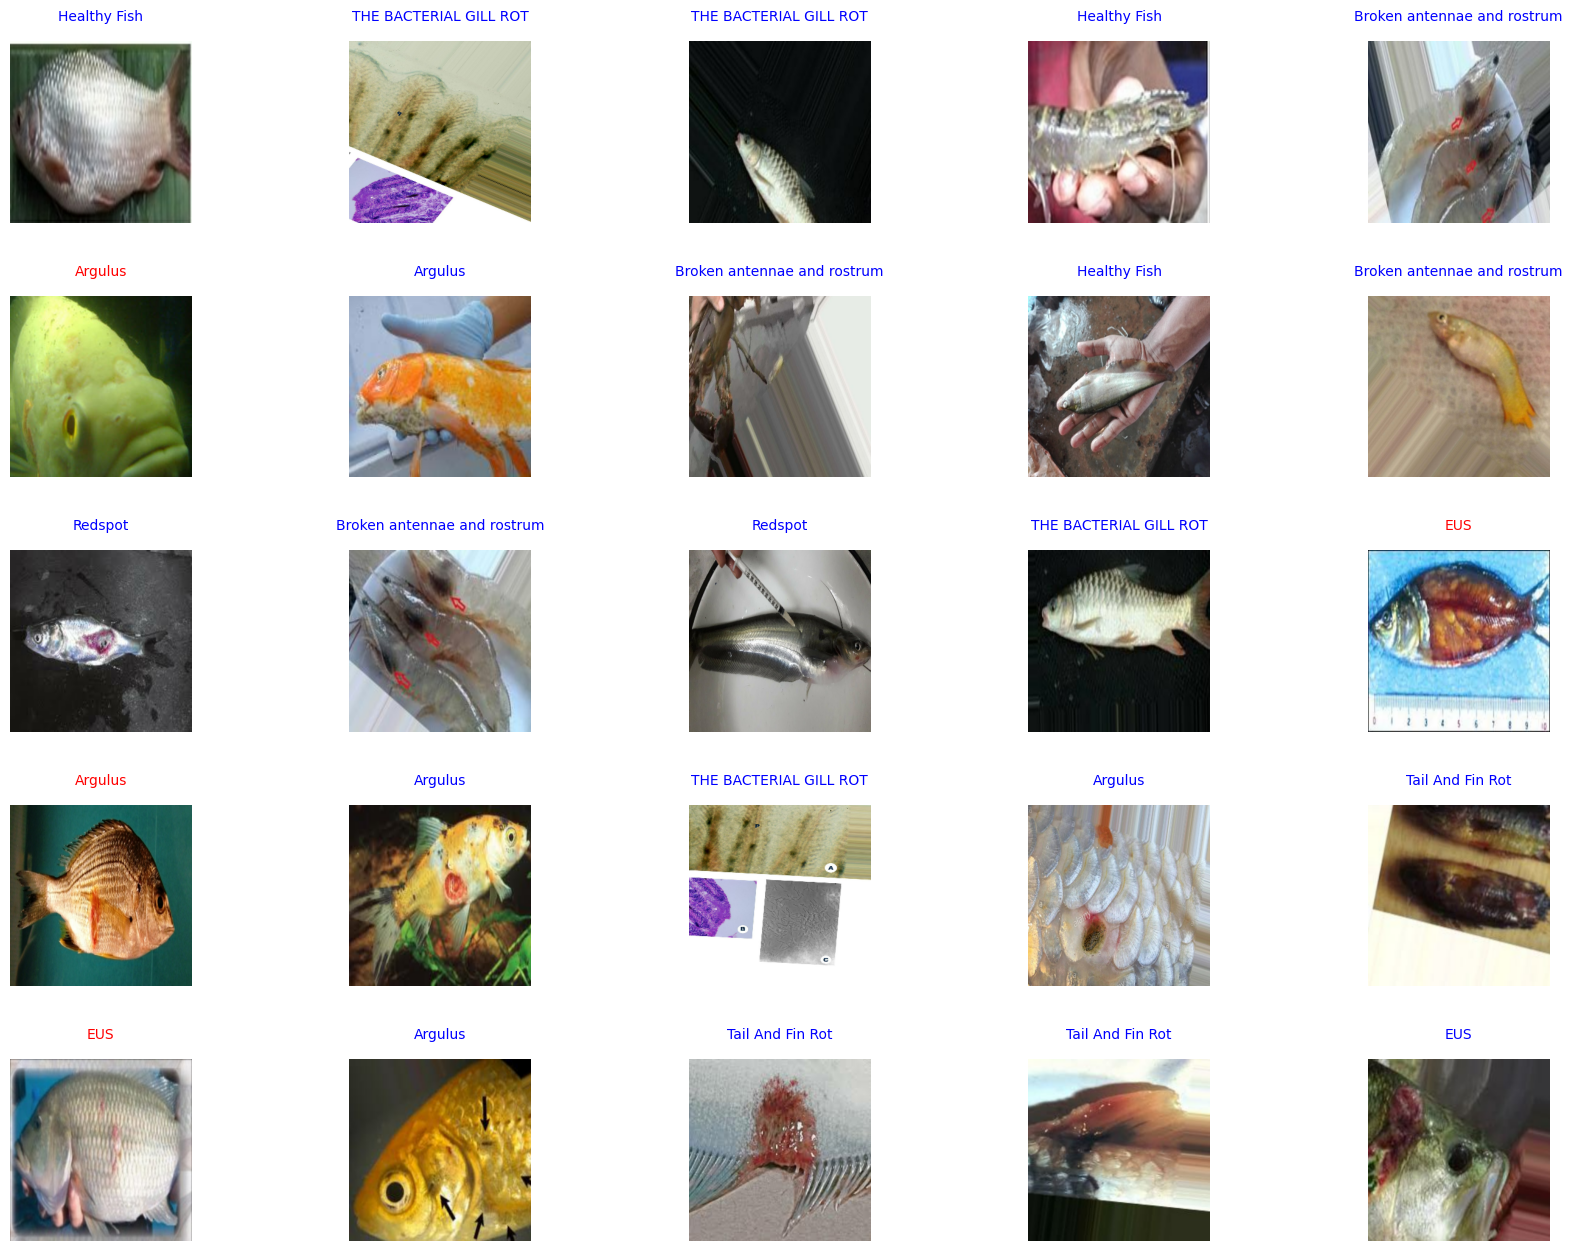

In [138]:
plt.figure(figsize=(20, 15))
for images, labels in test_dataset.take(1):
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")
        im2 = images[i].numpy().astype("uint8")
        img2 = tf.expand_dims(im2, 0)
        predict = fish.predict(img2)
        predicted= class_names[np.argmax(predict)]
        actual = class_names [labels[i].numpy().astype("uint8")]
        if (actual == predicted):
            plt.title(predicted, fontsize=10, color= 'blue', pad=15);
        else :
            plt.title(actual, fontsize=10, color= 'red' ,pad=15);
        plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9,
                            top=0.9, wspace=0.4,hspace=0.4)

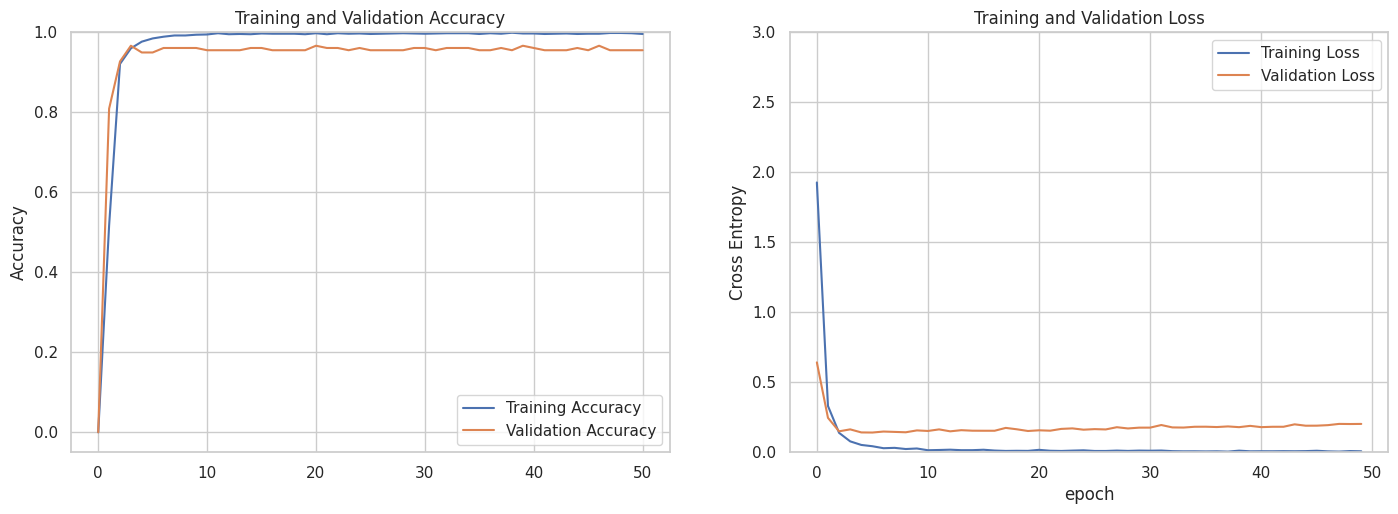

In [139]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(17, 12))
plt.subplot(2, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,3.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [140]:
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Initialize empty lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the validation dataset and make predictions
for images, labels in test_dataset:
    predictions = fish.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))
    true_labels.extend(labels.numpy())

# Binarize the true and predicted labels
true_labels_bin = label_binarize(true_labels, classes=np.unique(true_labels))
predicted_labels_bin = label_binarize(predicted_labels, classes=np.unique(predicted_labels))

# Compute class-specific ROC AUC values
roc_auc_per_class = []
for i in range(len(class_names)):
    roc_auc = roc_auc_score(true_labels_bin[:, i], predicted_labels_bin[:, i])
    roc_auc_per_class.append(roc_auc)

# Generate the classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names)

# Print class-specific ROC AUC values
for i in range(len(class_names)):
    print(f'ROC AUC for {class_names[i]}: {roc_auc_per_class[i]:.4f}')

# Print the classification report
print(report)


3/3 [==============================] - 4s 1s/step
ROC AUC for Argulus: 0.9134
ROC AUC for Broken antennae and rostrum: 0.9971
ROC AUC for EUS: 0.6749
ROC AUC for Healthy Fish: 0.8818
ROC AUC for Redspot: 0.8495
ROC AUC for THE BACTERIAL GILL ROT: 0.9971
ROC AUC for Tail And Fin Rot: 1.0000
                             precision    recall  f1-score   support

                    Argulus       0.81      0.86      0.83        29
Broken antennae and rostrum       0.96      1.00      0.98        25
                        EUS       0.69      0.38      0.49        29
               Healthy Fish       0.82      0.79      0.81        29
                    Redspot       0.59      0.79      0.68        29
     THE BACTERIAL GILL ROT       0.97      1.00      0.98        29
           Tail And Fin Rot       1.00      1.00      1.00        29

                   accuracy                           0.83       199
                  macro avg       0.83      0.83      0.82       199
               we

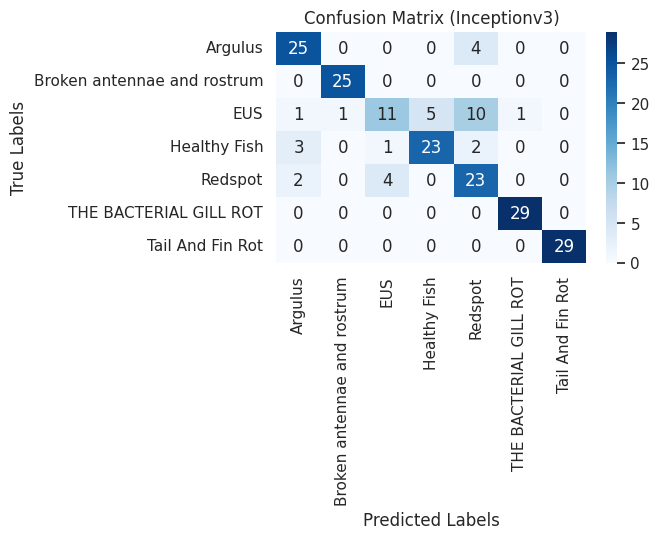

In [145]:
from sklearn.metrics import classification_report, confusion_matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Inceptionv3)')
plt.show()

3/3 [==============================] - 0s 111ms/step


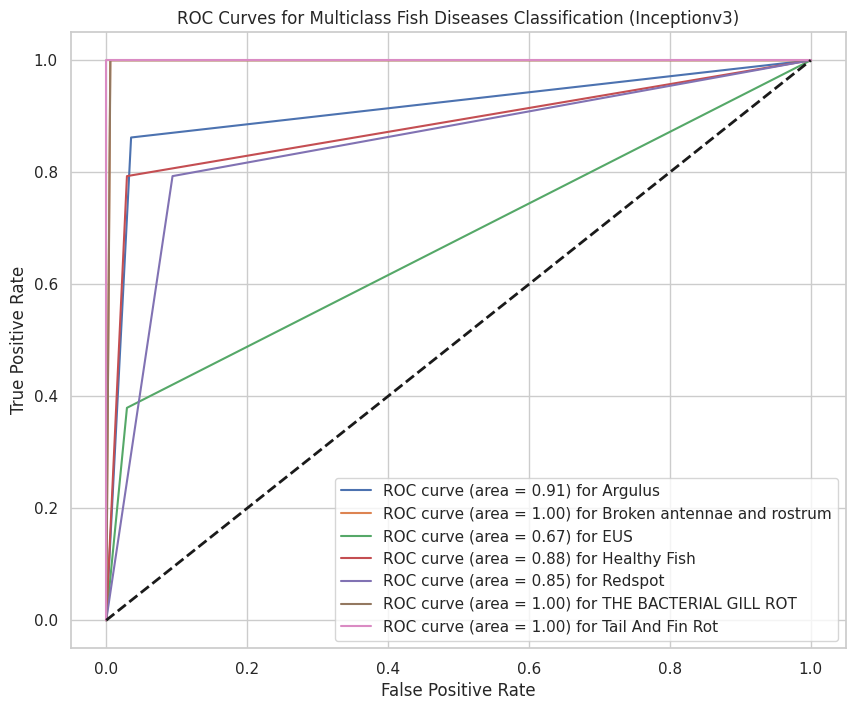

ROC AUC for Argulus: 0.9134
ROC AUC for Broken antennae and rostrum: 0.9971
ROC AUC for EUS: 0.6749
ROC AUC for Healthy Fish: 0.8818
ROC AUC for Redspot: 0.8495
ROC AUC for THE BACTERIAL GILL ROT: 0.9971
ROC AUC for Tail And Fin Rot: 1.0000
                             precision    recall  f1-score   support

                    Argulus       0.81      0.86      0.83        29
Broken antennae and rostrum       0.96      1.00      0.98        25
                        EUS       0.69      0.38      0.49        29
               Healthy Fish       0.82      0.79      0.81        29
                    Redspot       0.59      0.79      0.68        29
     THE BACTERIAL GILL ROT       0.97      1.00      0.98        29
           Tail And Fin Rot       1.00      1.00      1.00        29

                   accuracy                           0.83       199
                  macro avg       0.83      0.83      0.82       199
               weighted avg       0.83      0.83      0.82       19

In [144]:
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Initialize empty lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the validation dataset and make predictions
for images, labels in test_dataset:
    predictions = fish.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))
    true_labels.extend(labels.numpy())

# Binarize the true and predicted labels
true_labels_bin = label_binarize(true_labels, classes=np.unique(true_labels))
predicted_labels_bin = label_binarize(predicted_labels, classes=np.unique(predicted_labels))

# Compute class-specific ROC AUC values
roc_auc_per_class = []
for i in range(len(class_names)):
    roc_auc = roc_auc_score(true_labels_bin[:, i], predicted_labels_bin[:, i])
    roc_auc_per_class.append(roc_auc)

# Generate the classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names)

# Plot class-specific ROC curves
plt.figure(figsize=(10, 8))

for i in range(len(class_names)):
    fpr, tpr, _ = roc_curve(true_labels_bin[:, i], predicted_labels_bin[:, i])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f}) for {class_names[i]}')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiclass Fish Diseases Classification (Inceptionv3)')
plt.legend(loc='lower right')
plt.show()

# Print class-specific ROC AUC values
for i in range(len(class_names)):
    print(f'ROC AUC for {class_names[i]}: {roc_auc_per_class[i]:.4f}')

# Print the classification report
print(report)


In [147]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(true_labels, predicted_labels)
print(f'Cohen\'s Kappa: {kappa:.4f}')

Cohen's Kappa: 0.8006


In [148]:
from sklearn.metrics import matthews_corrcoef
import numpy as np

# Assuming true_labels and predicted_labels are your multiclass labels
mcc_values = [matthews_corrcoef(true_labels == i, predicted_labels == i) for i in np.unique(true_labels)]

average_mcc = np.mean(mcc_values)
print(f'Average Matthews Correlation Coefficient for Multiclass: {average_mcc:.4f}')



Average Matthews Correlation Coefficient for Multiclass: 0.8018


In [150]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

In [154]:
colors = ['blue', 'green', 'red', 'purple', 'orange','yellow','black']